# Multicollinearity

This question came up recently:

> In a linear regression, if you have two collinear predictors, what will happen to the coefficients if you use an L1 penalty? What about an L2 penalty?

Or in other words: How will a lasso regression model treat collinear features? Will a ridge regression behave differently?

I have an intuition here, but I'm not confident so let's try it.

## My intuition

In both L1 and L2 setting, one of the coefficients will be driven towards zero. 

In the L1 setting one of the coefficients will be zero.

In the L2 setting one of the coefficients will be close to zero.

Because the lasso model is able to totally ignore the redundant collinear feature it will likely perform slightly better.


## What's in the textbooks?

Section 6.4.4 p243 in [An Introduction to Statistical Learning](https://www-bcf.usc.edu/~gareth/ISL/) seems to suggest that where multiple features are collinear regularised models will tend choose one. Doesn’t make a distinction between lasso and ridge in context of collinearity.

## Let's try it

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn import linear_model

In [52]:
# Set up some convenience functions

def fit_lasso(X, y, X_test):
    """
    Fit lasso with L1 penalty
    """
    model = linear_model.Lasso(alpha=1.0, fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    return (y_pred, model.coef_)
    
def fit_ridge(X, y, X_test):
    """
    Fit ridge regression with L2 penalty
    """
    model = linear_model.Ridge(alpha=1.0, fit_intercept=True)
    model.fit(X, y)
    y_pred = model.predict(X_test)
    return (y_pred, model.coef_)

def plot(X, y, lasso_result, ridge_result):
    plt.scatter(X[:,0], y, label='x1')
    plt.scatter(X[:,1], y, label='x2')
    plt.plot(X_test[:,0], lasso_result[0], 'g--', label='lasso')
    plt.plot(X_test[:,0], ridge_result[0], 'r--', label='ridge')
    plt.ylabel('y')
    plt.xlabel('X')
    plt.legend()
    plt.show();

### Experiment A

Here feature `x2` is collinear with `x1` with a collinear gradient > 1.

In [65]:
# Simulate dataset with 2 collinear predictors
collinear_grad = 2

x1 = np.arange(-4, 4, .1)
# x2 is derived from x1 with noise
x2 = collinear_grad*x1 + 10 + np.random.randn(80)*1.0
# y1 is derived from x1 with noise
y = x1 + np.random.randn(80)*0.1
X = np.asarray([x1, x2]).T

# A grid of test values used to plot predictions
X_test = np.asarray([np.arange(-5, 20, 0.01), np.arange(-5, 20, 0.01)]).T

A quick pairplot to check `x1` and `x2` are collinear. We can verify this in row 1, column 2, where we see the two feature correlate when plotted against each other.

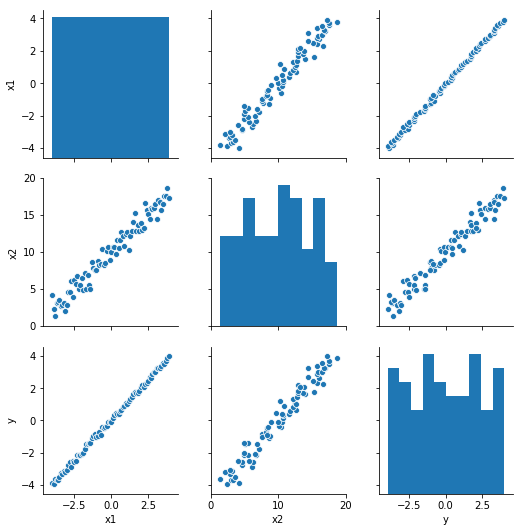

In [66]:
# Pair Plot
df = pd.DataFrame({'x1': x1, 'x2': x2, 'y':y})
sns.pairplot(df)

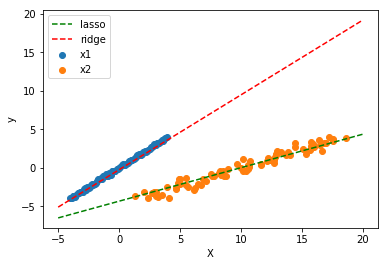

Lasso coefficients: [0.         0.43469015]
Ridge coefficients: [0.94459219 0.02664315]


In [67]:
# Fit lasso and regression models
lasso_result = fit_lasso(X, y, X_test)
ridge_result = fit_ridge(X, y, X_test)

# Display results
plot(X, y, lasso_result, ridge_result)
print(f'Lasso coefficients: {lasso_result[1]}')
print(f'Ridge coefficients: {ridge_result[1]}')

### Experiment B

Repeat experiment A with collinear grad < 1

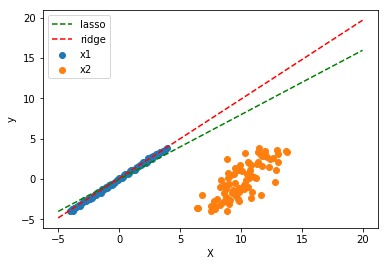

Lasso coefficients: [0.7994683 0.       ]
Ridge coefficients: [ 0.99001658 -0.00933774]


In [70]:
collinear_grad = 0.6

# Generate data
x1 = np.arange(-4, 4, .1)
x2 = collinear_grad*x1 + 10 + np.random.randn(80)*1.0
y = x1 + np.random.randn(80)*0.1
X = np.asarray([x1, x2]).T

# Fit lasso and regression models
lasso_result = fit_lasso(X, y, X_test)
ridge_result = fit_ridge(X, y, X_test)

# Display results
plot(X, y, lasso_result, ridge_result)
print(f'Lasso coefficients: {lasso_result[1]}')
print(f'Ridge coefficients: {ridge_result[1]}')

### Experiment C

Repeat experiment with collinear grad close to 1

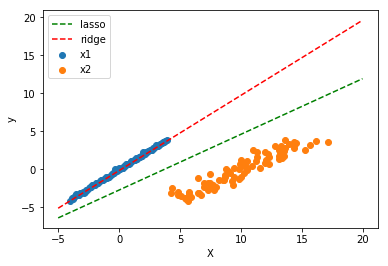

Lasso coefficients: [0.46365626 0.26945575]
Ridge coefficients: [0.97380841 0.01591451]


In [71]:
collinear_grad = 1.3

# Generate data
x1 = np.arange(-4, 4, .1)
x2 = collinear_grad*x1 + 10 + np.random.randn(80)*1.0
y = x1 + np.random.randn(80)*0.1
X = np.asarray([x1, x2]).T

# Fit lasso and regression models
lasso_result = fit_lasso(X, y, X_test)
ridge_result = fit_ridge(X, y, X_test)

# Display results
plot(X, y, lasso_result, ridge_result)
print(f'Lasso coefficients: {lasso_result[1]}')
print(f'Ridge coefficients: {ridge_result[1]}')